In [73]:
import pandas as pd

In [74]:
game = pd.read_csv('game.csv')
game_info = pd.read_csv('game_info.csv')
team = pd.read_csv('team.csv')
team_details = pd.read_csv('team_details.csv')

In [75]:
merged_df = pd.merge(game, game_info, on='game_id')

In [76]:
# TODO

# Group the dataframe by 'team_id'
grouped = merged_df.groupby(['team_id_home'])
merged_df['game_date_x'] = pd.to_datetime(merged_df['game_date_x'])

# Calculate the time differences in days for the 'game_date_x' column
time_diff = grouped['game_date_x'].diff().dt.days
merged_df['days_off_home'] = time_diff.fillna(0)

# Group the dataframe by 'team_id'
grouped = merged_df.groupby(['team_id_away'])
merged_df['game_date_x'] = pd.to_datetime(merged_df['game_date_x'])

# Calculate the time differences in days for the 'game_date_x' column
time_diff = grouped['game_date_x'].diff().dt.days
merged_df['days_off_away'] = time_diff.fillna(0)

In [77]:
merged_df['attendance'].isna().sum() 

5909

In [78]:
# TODO
merged_df = pd.merge(merged_df, team_details, left_on='team_id_home', right_on='team_id')
merged_df['attend_density'] = merged_df['attendance'] / merged_df['arenacapacity']

In [89]:
merged_df[merged_df['season_id'] >= 22001]['attend_density'].min()

0.0

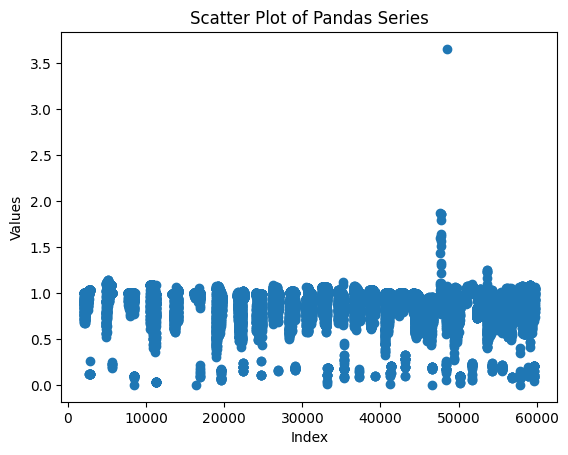

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pandas series
data = merged_df[merged_df['season_id'] >= 22001]['attend_density']

# Create a scatter plot
plt.scatter(x=data.index, y=data.values)

# Set the title and labels
plt.title("Scatter Plot of Pandas Series")
plt.xlabel("Index")
plt.ylabel("Values")

# Show the plot
plt.show()